# Data Bias: Fairness Gerrymandering

In this exercise you will slip into the role of data scientists that are requested as data experts for a judicial dispute.
The scenario in dispute is as follows:

A woman of color applied for a job at the company *MajorEngine*, but got rejected.
She suspects that she got turned down for racist and sexist reasons, *i.e.* because she is a woman of color.
*MajorEngine* refutes this claim and provides employment records in court in order to disprove the claims.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
        
# load the data from the file 'hiring_records_MajorEngine.csv' and inspect the first rows with the pandas function 'head'
# TODO: Your code goes here

df = pd.read_csv("hiring_records_MajorEngine.csv")
df.head()

,gender,race
0,male,white
1,female,white
2,female,white
3,male,white
4,male,hispanic


### Task 1


Slip into the role of a data scientist hired by *MajorEngine* in order to show that based on the employment records 

__(a)__ the company has no racist hiring policy, and 

__(b)__ has no strongly sexist hiring policy. Note that according to the [2020 U.S. census](https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States), the perfect, expected percentage of white employees would be 61.6%.

Use bar charts to convey your findings to a lay person and write a comment that explains your figure in favor of *MajorEngine*.

*Hint: While exploring the dataset, look at the ratio of white employees vs. non-white employees, and the ratio of male employees vs. non-male employees. It can also be useful to create a plot of the ideal distribution as comparison.*

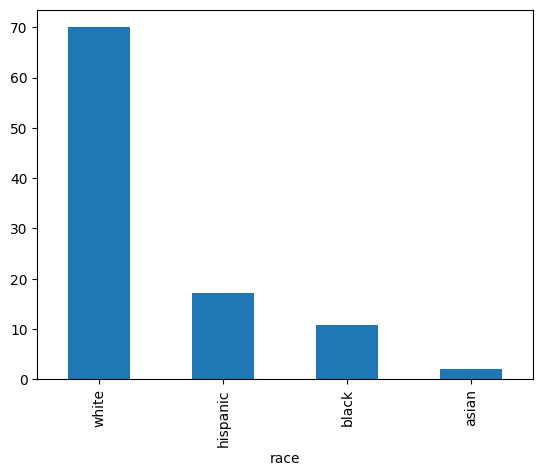

In [2]:
# Part (a): show that MajorEngine has no strongly racist hiring policy

# TODO: Your code goes here
x = df["race"].value_counts(normalize=True)*100
x.rename("race")
ax = x.plot.bar()

# as you can see on the chart, the percentage of white employess are 70% which is pretty close 61,6%


<Axes: xlabel='gender'>

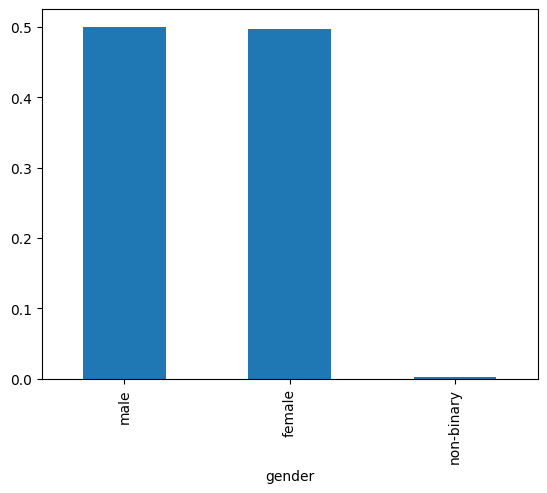

In [3]:
# Part (b): Show that MajorEngine has no sexist hiring policy

y = df["gender"].value_counts(normalize=True)
y.plot.bar()

# as you can see, there is no sexist hiring policy

### Task 2

Slip into the role of a data scientist that works pro bono in order to demonstrate that *MajorEngine* has exhibited a bias in the past and thus is likely to have treated the woman of color unfairly.

Use a confusion matrix to convey your findings to a lay person.

*Hint: While superficially, the argumentation form task 1 may seem sound, you have the sneaking suspicion that you should look at the two attributes 'race' and 'gender' in combination instead of separately.*

*Second hint: You may create a makeshift confusion matrix by creating another pandas dataframe of the four intersectional values and renaming columns and index.*

In [4]:
df2 = df.copy()
# df2 = df2.assign(color=lambda x: ("white" if x.race.str == "white" else "non-white")) why not working?

df2['race'] = df2['race'].apply(lambda x: 'white' if x == 'white' else 'non-white')
df2['gender'] = df2['gender'].apply(lambda x: 'male' if x == 'male' else 'non-male')
pd.crosstab(df2["gender"], df2["race"])




race,non-white,white
gender,,
male,300,200
non-male,0,500


Side note: The court case and its arguments are based on a true story. The provided data is obviously made up in order to paint a clearer picture for pedagogic reasons.